In [11]:
import pandas as pd
import numpy as np
import plotly.express as px
import copy
import datetime
import matplotlib.pyplot as plt

# Классификация строк 

In [2]:
print(datetime.datetime.now())

2022-03-14 12:44:13.640808


## JSON to DataFrame

## Данные

In [3]:
df_education = pd.read_csv('data/uuid_x_education_fields.csv', index_col=0)
df_education = df_education[~df_education['education_field_of_study'].isna()][['org_uuid', 'education_field_of_study']].reset_index(drop=True)

In [4]:
df_education

,org_uuid,education_field_of_study
0,438c7e89-ba0c-b8cc-7ea6-1a0ac47ae40d,English
1,438c7e89-ba0c-b8cc-7ea6-1a0ac47ae40d,"English, History"
2,b37187f2-8ad4-8225-cfa2-2757f2ef9bc4,"Electrical, Electronics and Communications Eng..."
3,46c990f6-e14d-3cfe-0bba-a95a6692cfad,Political Science
4,46a7242e-ff55-5748-a6d3-207bef892d3e,Computer Science (Informations Systems Special...
...,...,...
2617,e7d48747-e528-42a1-94d6-3f4c1e7d586a,Pure Mathematics
2618,3705f9f3-a94d-f2cc-e8a8-acd750ea60fd,Chemistry
2619,3705f9f3-a94d-f2cc-e8a8-acd750ea60fd,Physical Chemistry
2620,3a372b39-86d8-a24e-9fea-3be65013b476,Political Behavior


# sentence-transformers/multi-qa-MiniLM-L6-cos-v1

## Education field of study

In [5]:
# ToDo DataFrame with first, second, third, ...

In [6]:
from sentence_transformers import SentenceTransformer, util

threshold = 0.35
classes = ["Biology", "Computer Science", "Management", "Finance"]

#Load the model
model = SentenceTransformer('sentence-transformers/multi-qa-MiniLM-L6-cos-v1')

classification_vec = []
first_vec, second_vec = [], []

for i, query in enumerate(df_education['education_field_of_study']):
    
    print('{} / {}'.format(i+1, df_education.shape[0]), end="\r")
    
    #Encode query and documents
    query_emb = model.encode(query)
    classes_emb = model.encode(classes)

    #Compute dot score between query and all document embeddings
    scores = util.dot_score(query_emb, classes_emb)[0].cpu().tolist()
    
    first_score = np.partition(scores, -1)[-1]
    second_score = np.partition(scores, -2)[-2]
    
    if first_score > threshold:
        i = np.argmax(scores)
        classification_vec.append(classes[i])
    else:
        classification_vec.append("Other") 
    first_vec.append(first_score)
    second_vec.append(second_score)
        
df_classes = pd.DataFrame(data=classification_vec, columns=["Class"])
df_first = pd.DataFrame(data=first_vec, columns=["top1"])
df_second = pd.DataFrame(data=second_vec, columns=["top2"])
    
df = pd.concat(
    [
        df_education,
        df_classes, 
        df_first,
        df_second
    ], axis=1
)

In [7]:
model.save('models/multi-qa-MiniLM-L6-cos-v1')

In [11]:
df.to_csv('data/features/education_field_of_study_classes.csv')

In [12]:
df.head(20)

,org_uuid,education_field_of_study,Class,top1,top2
0,438c7e89-ba0c-b8cc-7ea6-1a0ac47ae40d,English,Other,0.201535,0.198198
1,438c7e89-ba0c-b8cc-7ea6-1a0ac47ae40d,"English, History",Other,0.145493,0.142640
2,b37187f2-8ad4-8225-cfa2-2757f2ef9bc4,"Electrical, Electronics and Communications Eng...",Computer Science,0.446723,0.250942
3,46c990f6-e14d-3cfe-0bba-a95a6692cfad,Political Science,Computer Science,0.395413,0.278185
4,46a7242e-ff55-5748-a6d3-207bef892d3e,Computer Science (Informations Systems Special...,Computer Science,0.694438,0.363370
5,1ee72ff8-102f-fe07-a823-73ccece54f09,Computer Science,Computer Science,1.000000,0.256522
6,aa85c39b-4a8a-960e-cfef-063129816e28,Finance,Finance,1.000000,0.256522
7,aa85c39b-4a8a-960e-cfef-063129816e28,Chemistry and Business,Other,0.349468,0.291982
8,4f3eed85-1fab-f448-8f92-7126d202ed0d,Electrical Engineering,Computer Science,0.381583,0.193875
9,4d17e9c7-47e6-ea9a-84f1-80e56bd219d3,Biology,Biology,1.000000,0.236289


In [14]:
df['Class'].value_counts()

Other               867
Finance             592
Computer Science    559
Management          350
Biology             254
Name: Class, dtype: int64

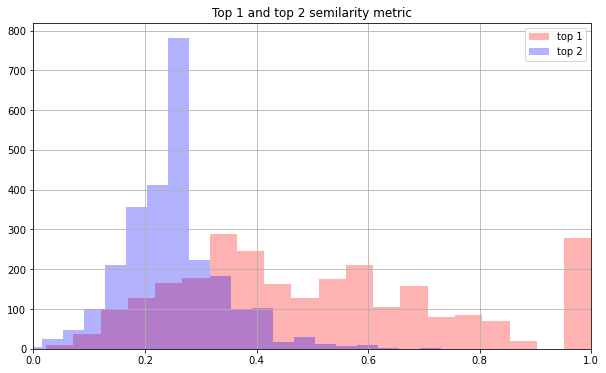

In [43]:
plt.figure(figsize=(10,6))
plt.title('Top 1 and top 2 semilarity metric')
df['top1'].hist(bins=20, color='r', alpha=0.3, label='top 1')
df['top2'].hist(bins=20, color='b', alpha=0.3, label='top 2')
plt.xlim(0, 1)
plt.legend()
plt.show()